    Import Necessary libraries

In [ ]:
import pandas as pd # library for data manipulation
import numpy as np
import matplotlib.pyplot as plt # library for visualization

    Data Import / Data Ingestion  / Data loading
    CSV is one of text format files 
        Default Separator ,

In [ ]:
df = pd.read_csv('../accio/bank-additional.csv',sep=";")

    Check the data

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

    Get Data Description

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

    Purchase rate Age wise

In [ ]:
df['age'].unique()

In [ ]:
df['age'].value_counts()

In [ ]:
df['y'].value_counts()

In [ ]:
df['y'].value_counts()

In [ ]:
df[df['y']=='yes']

In [ ]:
gr1=df[df['age']<25][['age','y']]

In [ ]:
gr2=df[df['age']>=25][['age','y']]

In [ ]:
gr1

In [ ]:
gr2

In [ ]:
gr1['y'].value_counts()

In [ ]:
(12/98)*100

In [ ]:
(gr1['y'].value_counts()['yes']/gr1.shape[0])*100

In [ ]:
(gr2['y'].value_counts()['yes']/gr2.shape[0])*100

In [ ]:
gr1=df[df['age']<35][['age','y']]

In [ ]:
gr2=df[df['age']>=35][['age','y']]

In [ ]:
df.columns

    Purchase rate  vs Marital Status

In [ ]:
(df[['marital','y']].value_counts()/df.shape[0])*100


In [ ]:
df['marital'].value_counts()

In [ ]:
df['marital']=='married'

In [ ]:
df[df['marital']=='married'][['marital','y']]

In [ ]:
df[df['marital']=='married'][['marital','y']].value_counts()/df[df['marital']=='married'][['marital','y']].shape[0]

In [ ]:
df.head()

In [ ]:
df['duration'].max()/60

In [ ]:
df.sort_values(by = "duration", ascending = False).head()

In [ ]:
df_sorted_duration=df.sort_values(by = "duration", ascending = False)
df_sorted_duration[['duration','day_of_week','y']].head(5)

In [ ]:
df['duration'].min()

In [ ]:
df['day_of_week'].value_counts(normalize=True)*100

In [ ]:
df[['day_of_week','y']].head()

In [ ]:
df_25_30_age_duration=df[(df['age']>25) & (df['age']<30)].sort_values(by = ["age", "duration"], ascending = [True, False])
df_25_30_age_duration_filtered=df_25_30_age_duration[["age", "duration",'y']]

In [ ]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head(20)

In [ ]:
df_25_30_age_duration_filtered['y'].value_counts()

In [ ]:
df['y'].unique()

In [ ]:
df['y']=df['y'].replace({"no":0,"yes":1})

In [ ]:
df['y'].sum()

In [ ]:
48*100/348

    Female => 25%
    Female who are between 25 -35 => 12% 28%
    Female who are between 35 -55 => 5%
    Female  india 10 %
    Female US 30%

In [ ]:
df_age_duration=df.sort_values(by = ["age", "duration"], ascending = [True, False])
df_age_duration[["age", "duration",'y']].head(20)

In [ ]:
df[['duration','y']]

    What is the average time we are spending to get a subscription

In [ ]:
df[df['y']==1]['duration'].mean()

In [ ]:
df[df['y']==0]['duration'].mean()

In [ ]:
df.groupby('y')['duration'].mean()

    What is the average age of attracted (y == 1) and unmarried ('marital' == 'single') clients?

In [ ]:
df.head()

In [ ]:
df['marital'].value_counts()

In [ ]:
df[(df['y']==1) & (df['marital']=='married')]['age'].mean()

In [ ]:
df[(df['y']==1) & (df['marital']=='single')]['age'].mean()

In [ ]:
df[(df['y']==1) & (df['marital']=='divorced')]['age'].mean()

In [ ]:
df[(df['y']==1) & (df['marital']=='unknown')]['age'].mean()

In [ ]:
df[(df['y']==1)]['age'].mean()

In [ ]:
df_y=df[df['y']==1][['marital','age','y']]

In [ ]:
df_y.groupby('marital')['age'].mean()

    What is the distribution of marital status in terms of subscription

    Crosstab - categorical Data
        normalize
            row wise = index

    Pivot_table

In [ ]:
pd.crosstab(df['y'],df['marital'],normalize='index')*100

In [ ]:
df_agg=df.pivot_table(
    columns=['marital'],
    values=["age", "duration"],
    index=["job",'education'],
    margins=True,
    margins_name='Total Value',
    fill_value="NA"
    # aggfunc = {"age":"count","duration":"mean"},
)

In [ ]:
df.columns

In [ ]:
df_agg.reset_index()

In [ ]:
df.pivot_table(
    columns=['marital'],
    values=["age", "duration"],
    index=["job"],
    aggfunc = {"age":"count","duration":"mean"},
).head(10)

In [ ]:
df.pivot_table(
    columns=['marital'],
    values=["age", "duration"],
    index=["job"],
    # aggfunc = {"age":"count","duration":"mean"},
).head(10)

In [ ]:
df.pivot_table(
    columns=['marital'],
    values=["age", "duration"],
    index=["job"],
    aggfunc = "mean",
).head(10)

In [ ]:
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.hist(df['age'])
plt.xlabel('age')
plt.ylabel('Nos')
plt.title('Age Distribution')
plt.show()

In [ ]:
sns.histplot(df['age'])

In [ ]:
plt.scatter(df['age'],df['duration'])
plt.show()

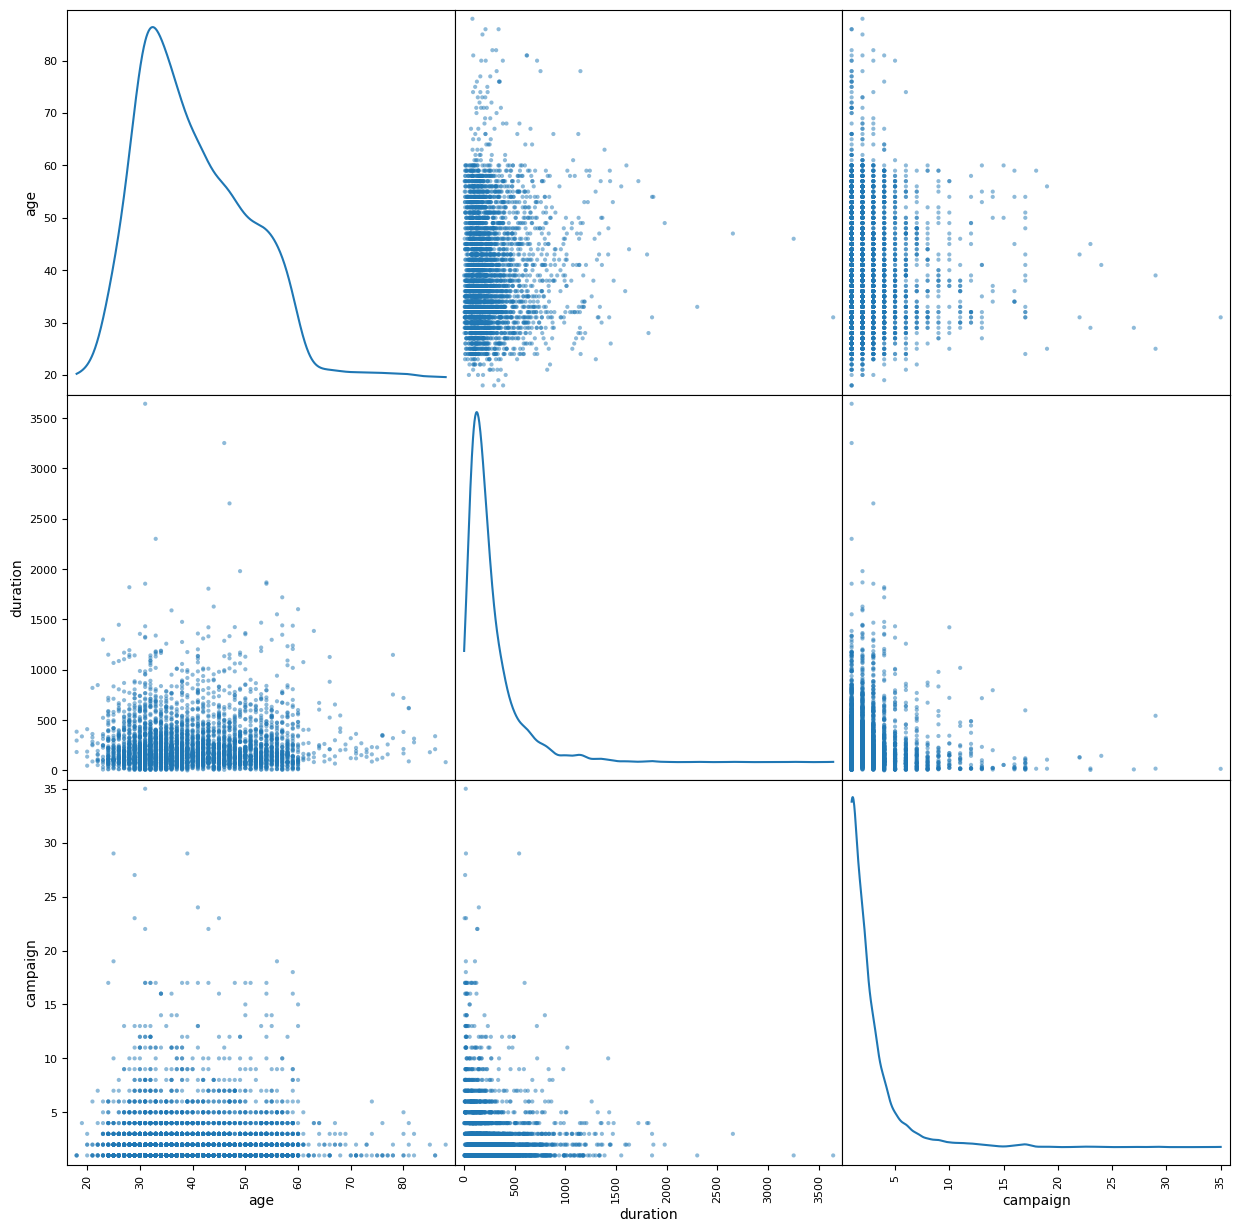

In [191]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde") # Kernal Density Estimation
plt.show()

In [192]:
df.sort_values(by = "campaign", ascending = False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
2552,31,services,single,high.school,no,no,no,cellular,jul,thu,16,35,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
3564,25,admin.,single,basic.9y,no,no,no,cellular,jul,thu,18,29,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
3241,39,services,married,high.school,no,yes,no,cellular,jul,thu,543,29,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
56,29,admin.,single,university.degree,no,yes,no,telephone,jun,fri,10,27,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
2485,41,technician,married,high.school,no,yes,no,telephone,jun,fri,145,24,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
2988,45,services,married,professional.course,no,yes,no,cellular,jul,mon,19,23,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
2202,29,technician,married,university.degree,no,no,no,cellular,jul,thu,5,23,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
713,43,admin.,married,high.school,no,yes,no,cellular,jul,mon,128,22,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
3569,31,admin.,single,high.school,no,no,no,telephone,may,thu,132,22,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
886,56,technician,married,university.degree,unknown,no,no,cellular,jul,mon,17,19,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0


In [194]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = {"age":"median", "campaign":"count"},
)

,age,campaign
education,,
basic.4y,48.0,429
basic.6y,39.0,228
basic.9y,38.0,574
high.school,36.0,921
illiterate,42.0,1
professional.course,38.0,535
university.degree,36.0,1264
unknown,41.0,167


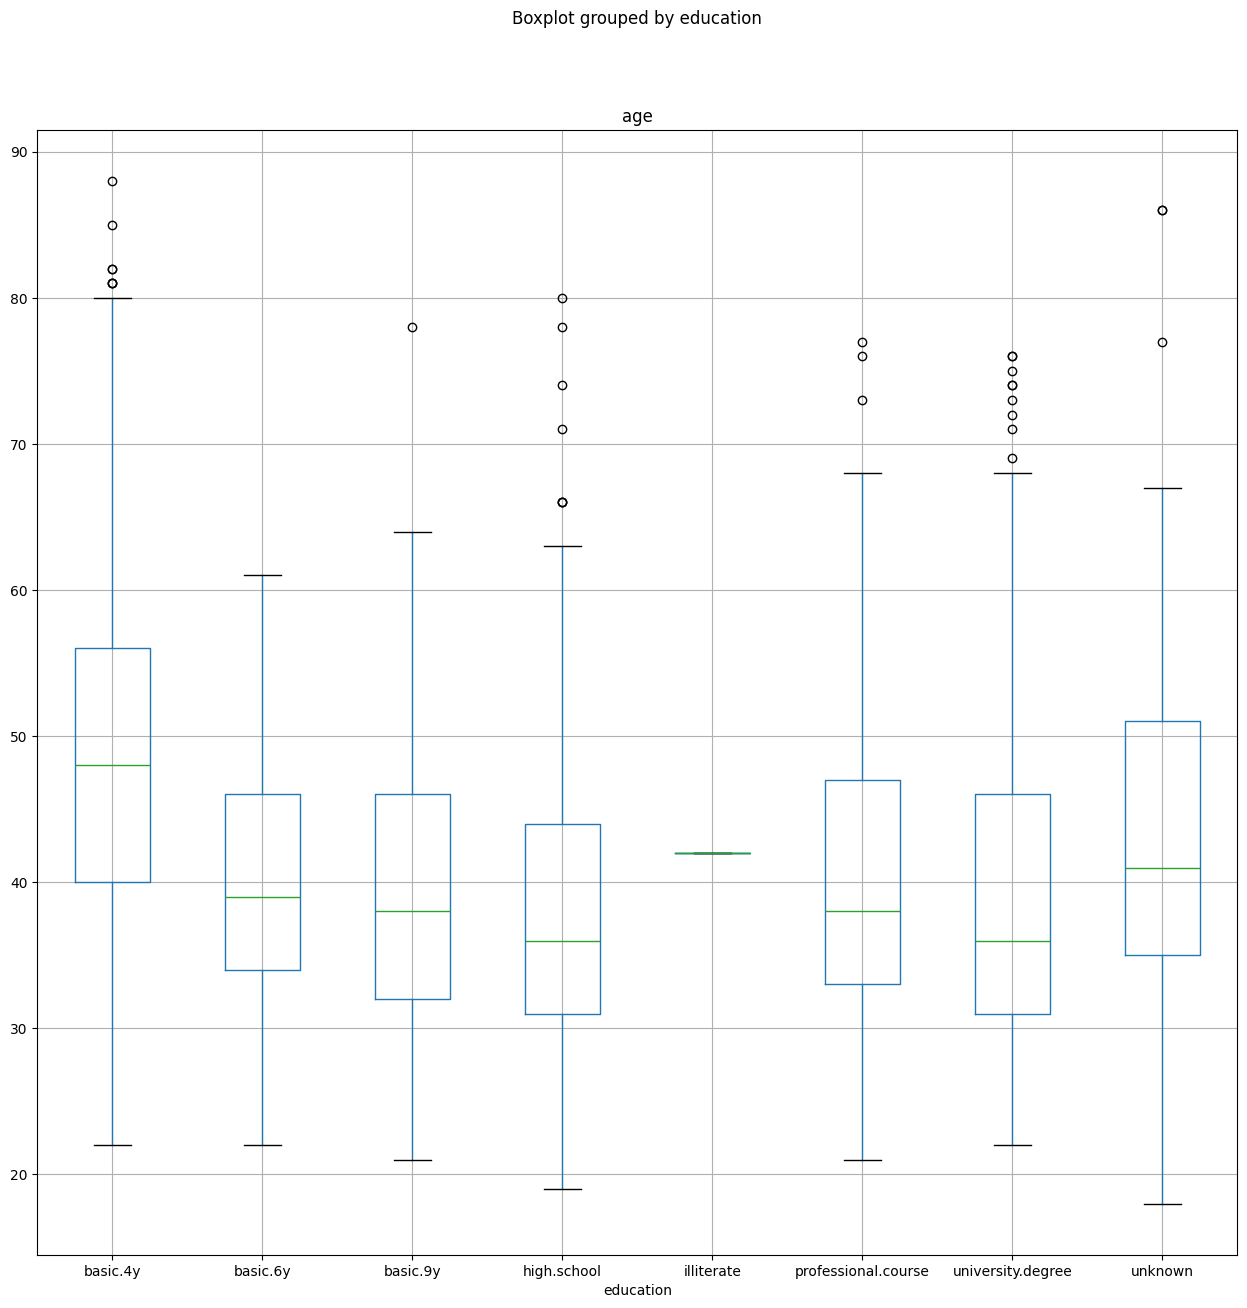

In [195]:
df.boxplot(column = "age",
  by = "education",
  figsize = (15, 15))
plt.show()

In [ ]:
sns.pairplot(df[["age", "duration", "campaign"]])

In [ ]:
plt.boxplot(df['age'])
plt.show()

In [ ]:
np.percentile(df['age'])

    min         18
    25  Q1      32
    50  Q2      38
    75  Q3      47
    max Q4      88
    IQR    Q3-Q1    47-32
        15

In [ ]:
q1=np.percentile(df['age'],25)
q3=np.percentile(df['age'],75)
iqr=q3-q1

In [ ]:
u = q3+1.5*iqr
l = q1-1.5*iqr

In [ ]:
u,l

In [ ]:
plt.boxplot(df[df['marital']=='divorced']['age'])
plt.show()

In [ ]:
plt.boxplot(df[df['marital']=='married']['age'])
plt.show()

In [ ]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

In [ ]:
df['marital'].value_counts()

In [ ]:
df['housing'].value_counts()

In [ ]:
married yes
married no
married unknown

single yes
single no
single unknown

In [ ]:
df[df['marital']=='divorced']

<Axes: >

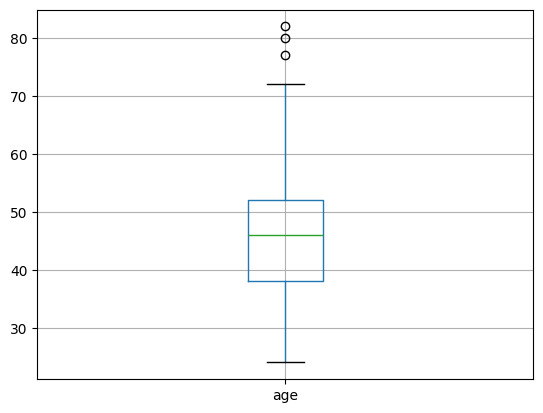

In [187]:
df[(df['marital']=='divorced') & (df['housing']=='no')][['age','marital','housing']].boxplot('age')

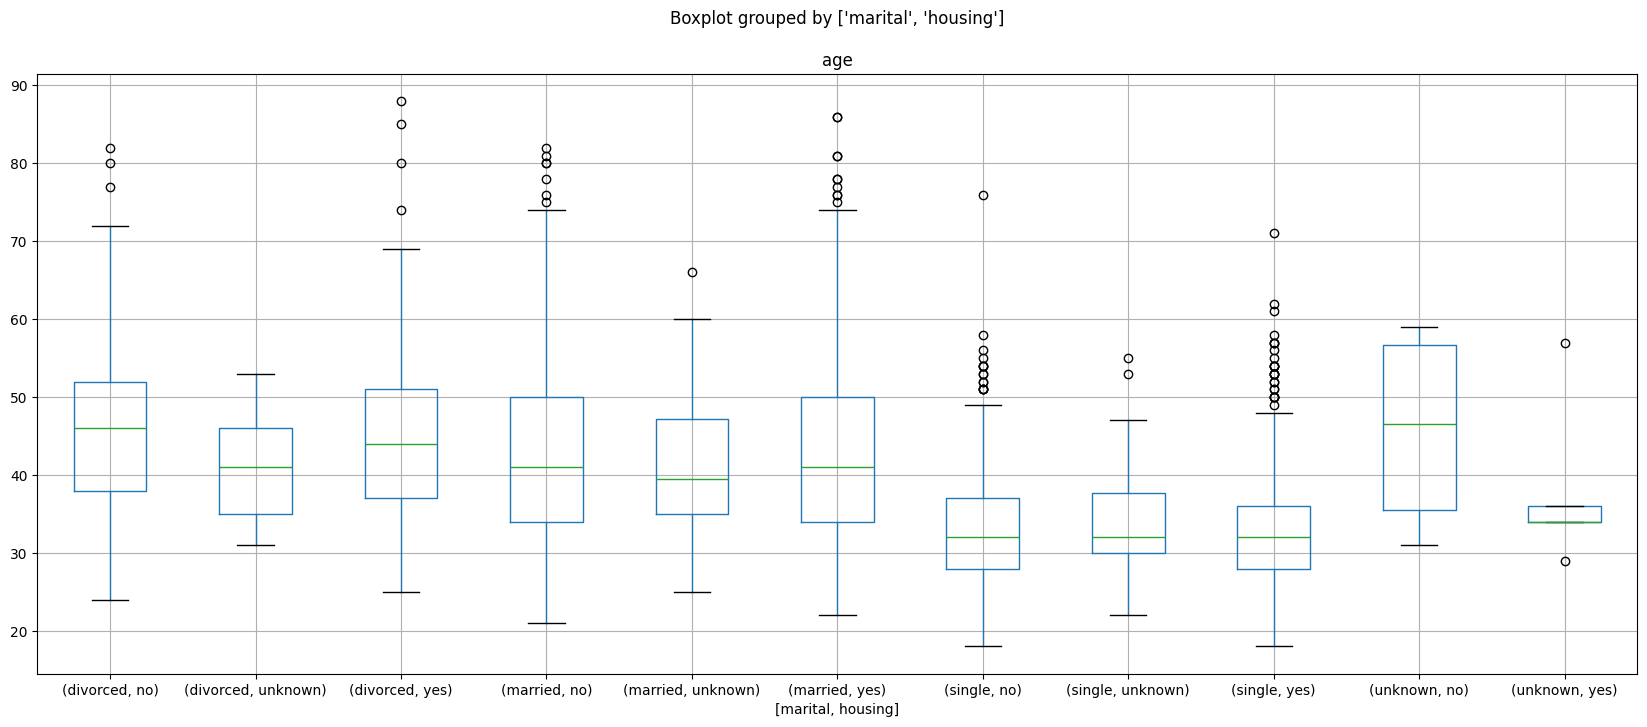

In [190]:
df.boxplot(column = "age",
           by = ["marital", "housing"],
           figsize = (20, 8))
plt.show()